# **Driver Behavior Analysis Using Deep Learning**





Driver behavior is a critical factor in road safety. This section aims to analyze and classify driver behavior using deep learning techniques. By processing dashcam images or videos, we identify risky or distracted behavior patterns. The objective is to promote road safety and provide alerts through intelligent detection systems. This also leverages computer vision and deep learning to automatically detect actions such as texting, eating, or being distracted while driving.

AIM:

- To classify different types of driver behavior
- To build and train a deep learning model on driver images
- To evaluate performance using classification metrics
- To visualize model predictions for better interpretability

### Description:

- **Dataset**: Distracted Driver Detection dataset - images/frames
- **Classes**: e.g., safe driving, texting, talking, eating, drinking, adjusting controls, etc.
- **Data Preprocessing**:
   - Image resizing, normalization
   - Data augmentation (rotation, flip, etc.)
   - Class imbalance for certain behaviors
   - Visual similarity between different actions
- **Model Building**:
   - Convolutional Neural Networks (CNNs)
   - Layers: Conv2D → MaxPool → Dense → Softmax
- **Training**:
   - Categorical Cross-Entropy loss, Adam optimizer
   - Epochs, validation splits
- **Evaluation**:
   - Accuracy, Confusion Matrix, Precision/Recall

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tqdm import tqdm

train_path = '/Users/isha/Desktop/DL_Project/driver_behaviour_detection/imgs/train'
test_path = '/Users/isha/Desktop/DL_Project/driver_behaviour_detection/imgs/test'

label_map = {
    'c0': 'safe driving',
    'c1': 'texting - right',
    'c2': 'talking on the phone - right',
    'c3': 'texting - left',
    'c4': 'talking on the phone - left',
    'c5': 'operating the radio',
    'c6': 'drinking',
    'c7': 'reaching behind',
    'c8': 'hair and makeup',
    'c9': 'talking to passenger'
}

image_size = (64, 64)
X_train = []
y_train = []

for label in label_map.keys():
    folder_path = os.path.join(train_path, label)
    for img_name in tqdm(os.listdir(folder_path), desc=f"Loading train/{label}"):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, image_size)
            X_train.append(img)
            y_train.append(int(label[-1]))

X_train = np.array(X_train)
y_train = to_categorical(np.array(y_train), num_classes=10)
X_train = X_train / 255.0

X_test = []
test_filenames = []

for img_name in tqdm(os.listdir(test_path), desc="Loading test"):
    img_path = os.path.join(test_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, image_size)
        X_test.append(img)
        test_filenames.append(img_name)

X_test = np.array(X_test)
X_test = X_test / 255.0

datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(X_train)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, verbose=1)

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

submission_df = pd.DataFrame({
    'Image': test_filenames,
    'Predicted_Class': predicted_classes
})
submission_df.to_csv('driver_behavior_predictions.csv', index=False)

print(" Training complete. Predictions saved to 'driver_behavior_predictions.csv'")


Loading test: 100%|█████████████████████| 79726/79726 [01:07<00:00, 1174.37it/s]
/Users/isha/Desktop/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/Users/isha/Desktop/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


701/701 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.1376 - loss: 2.2495
Epoch 2/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.3917 - loss: 1.6248
Epoch 3/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5057 - loss: 1.3141
Epoch 4/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.5965 - loss: 1.1113
Epoch 5/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.6527 - loss: 0.9751
Epoch 6/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.6800 - loss: 0.8916
Epoch 7/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.7207 - loss: 0.7999
Epoch 8/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.7455 - loss: 0.7479
Epoch 9/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.7557 - loss: 0.7047
Epoch 10/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.7833 - loss: 0.6546
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step
 Training complete. Predictions saved to 'driver_behavior_predictions.csv'


### Results and Visualizations:

- Training/validation accuracy and loss curves
- Confusion matrix for multi-class evaluation
- Sample predictions with true and predicted labels

701/701 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


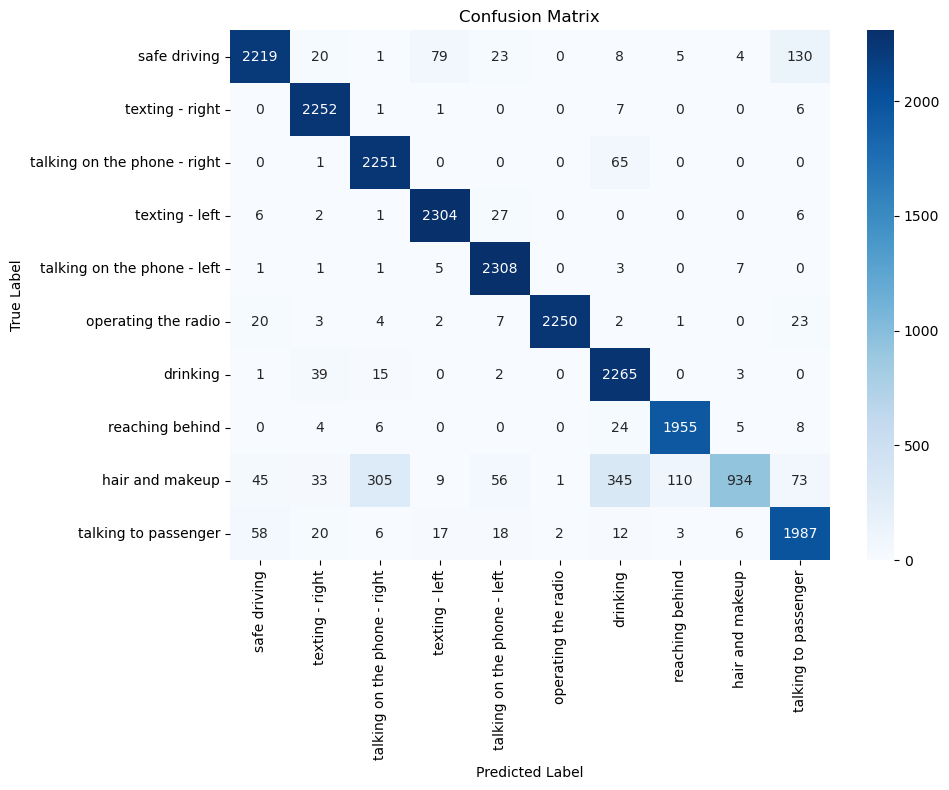

Classification Report:
                              precision    recall  f1-score   support

                safe driving       0.94      0.89      0.92      2489
             texting - right       0.95      0.99      0.97      2267
talking on the phone - right       0.87      0.97      0.92      2317
              texting - left       0.95      0.98      0.97      2346
 talking on the phone - left       0.95      0.99      0.97      2326
         operating the radio       1.00      0.97      0.99      2312
                    drinking       0.83      0.97      0.90      2325
             reaching behind       0.94      0.98      0.96      2002
             hair and makeup       0.97      0.49      0.65      1911
        talking to passenger       0.89      0.93      0.91      2129

                    accuracy                           0.92     22424
                   macro avg       0.93      0.92      0.91     22424
                weighted avg       0.93      0.92      0.92     2

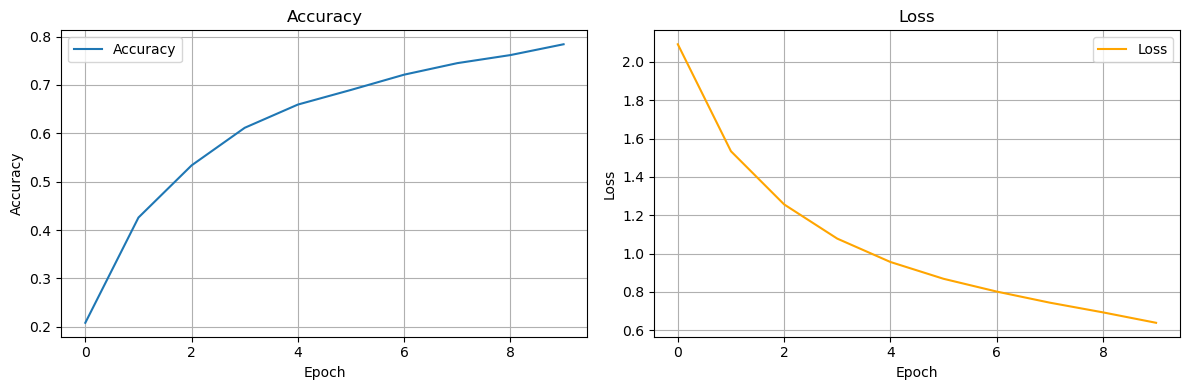

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_train_pred = model.predict(X_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_true = np.argmax(y_train, axis=1)

cm = confusion_matrix(y_train_true, y_train_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

print("Classification Report:")
print(classification_report(y_train_true, y_train_pred_classes, target_names=label_map.values()))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss', color='orange')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


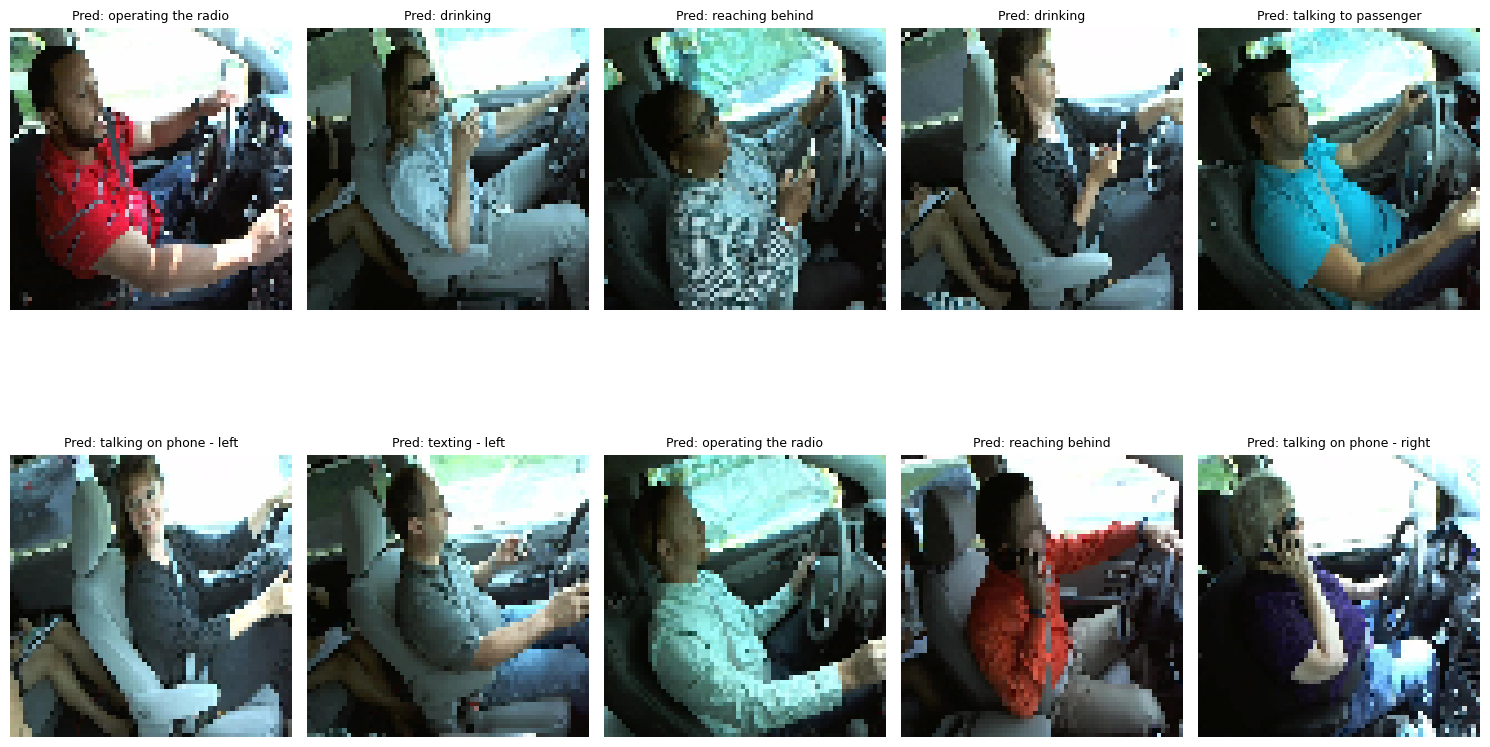

In [7]:
import matplotlib.pyplot as plt

class_names = [
    'safe driving', 'texting - right', 'talking on phone - right',
    'texting - left', 'talking on phone - left', 'operating the radio',
    'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger'
]

num_images = 10
plt.figure(figsize=(15, 10))

for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    
    img_uint8 = (X_test[i] * 255).astype(np.uint8)
    img_rgb = cv2.cvtColor(img_uint8, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img_rgb)
              
    pred_class = predicted_classes[i]
    plt.title(f"Pred: {class_names[pred_class]}", fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [11]:
model.save_weights('driver_behavior.weights.h5')
print("Model weights saved to 'driver_behavior.weights.h5'")


Model weights saved to 'driver_behavior.weights.h5'


## 2. LSTM

Loading training sequences...


/Users/isha/Desktop/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_2              │ (None, 5, 5, 5, 1280)  │     2,257,984 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 5, 1280)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       721,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,980,682 (11.37 MB)

 Trainable params: 722,698 (2.76 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.0920 - loss: 2.4255 - val_accuracy: 0.1700 - val_loss: 2.2405
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.2050 - loss: 2.1515 - val_accuracy: 0.3200 - val_loss: 2.1328
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.4367 - loss: 1.9186 - val_accuracy: 0.4700 - val_loss: 1.9192
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.5553 - loss: 1.6300 - val_accuracy: 0.6000 - val_loss: 1.5620
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.7091 - loss: 1.2521 - val_accuracy: 0.7400 - val_loss: 1.2733
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.7931 - loss: 0.9467 - val_accuracy: 0.7600 - val_loss: 1.0656
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.8521 - loss: 0.7531 - val_accuracy: 0.8600 - val_loss: 0.8015
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.8834 - loss: 0.5384 - val_accuracy: 0

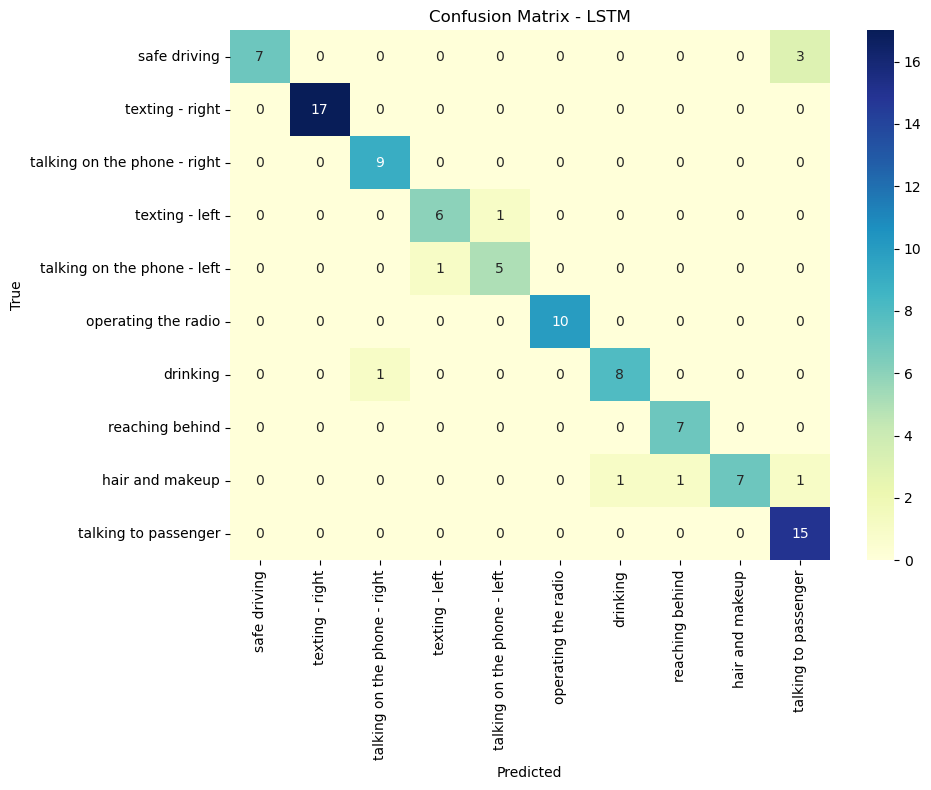

Classification Report:
                              precision    recall  f1-score   support

                safe driving       1.00      0.70      0.82        10
             texting - right       1.00      1.00      1.00        17
talking on the phone - right       0.90      1.00      0.95         9
              texting - left       0.86      0.86      0.86         7
 talking on the phone - left       0.83      0.83      0.83         6
         operating the radio       1.00      1.00      1.00        10
                    drinking       0.89      0.89      0.89         9
             reaching behind       0.88      1.00      0.93         7
             hair and makeup       1.00      0.70      0.82        10
        talking to passenger       0.79      1.00      0.88        15

                    accuracy                           0.91       100
                   macro avg       0.91      0.90      0.90       100
                weighted avg       0.92      0.91      0.91      

Preparing test: 100%|███████████████████| 79726/79726 [01:14<00:00, 1073.51it/s]


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Paths
train_path = '/Users/isha/Desktop/DL_Project/driver_behaviour_detection/imgs/train'
test_path = '/Users/isha/Desktop/DL_Project/driver_behaviour_detection/imgs/test'

label_map = {
    'c0': 'safe driving',
    'c1': 'texting - right',
    'c2': 'talking on the phone - right',
    'c3': 'texting - left',
    'c4': 'talking on the phone - left',
    'c5': 'operating the radio',
    'c6': 'drinking',
    'c7': 'reaching behind',
    'c8': 'hair and makeup',
    'c9': 'talking to passenger'
}

# Constants
frame_sequence = 5
image_size = (160, 160)

# Load sequences from training data
def load_train_sequences():
    X_seq, y_seq = [], []
    for label in label_map:
        folder = os.path.join(train_path, label)
        images = sorted(os.listdir(folder))[:frame_sequence*50]
        for i in range(0, len(images) - frame_sequence + 1, frame_sequence):
            seq = []
            for j in range(frame_sequence):
                img_path = os.path.join(folder, images[i+j])
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, image_size)
                    seq.append(img)
            if len(seq) == frame_sequence:
                X_seq.append(seq)
                y_seq.append(int(label[1]))
    return np.array(X_seq), to_categorical(np.array(y_seq), num_classes=10)

print("Loading training sequences...")
X_seq, y_seq = load_train_sequences()
X_seq = X_seq / 255.0

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Model
cnn_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
cnn_base.trainable = False

model = Sequential([
    TimeDistributed(cnn_base, input_shape=(frame_sequence, 160, 160, 3)),
    TimeDistributed(GlobalAveragePooling2D()),
    LSTM(128),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=8)

# Evaluation on validation set
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_val_true, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.values(), yticklabels=label_map.values(), cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - LSTM")
plt.tight_layout()
plt.show()

print("Classification Report:")
print(classification_report(y_val_true, y_val_pred, target_names=label_map.values()))

# Predict on test folder
print("Predicting on test folder...")
test_filenames = []
X_test_seq = []

for img_name in tqdm(os.listdir(test_path), desc="Preparing test"):
    img_path = os.path.join(test_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, image_size)
        seq = [img] * frame_sequence  # simulate sequence by repeating
        X_test_seq.append(seq)
        test_filenames.append(img_name)

X_test_seq = np.array(X_test_seq) / 255.0
predictions = model.predict(X_test_seq)
predicted_classes = np.argmax(predictions, axis=1)

# Save predictions
submission_df = pd.DataFrame({
    'Image': test_filenames,
    'Predicted_Class': predicted_classes
})
submission_df.to_csv('lstm_driver_behavior_predictions.csv', index=False)

print("Predictions saved to 'lstm_driver_behavior_predictions.csv'")

# Plot Training Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## 3. 

In [3]:
# Re-importing required modules after kernel reset
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
train_path = '/Users/isha/Desktop/DL_Project/driver_behaviour_detection/imgs/train'
test_path = '/Users/isha/Desktop/DL_Project/driver_behaviour_detection/imgs/test'

label_map = {
    'c0': 'safe driving',
    'c1': 'texting - right',
    'c2': 'talking on the phone - right',
    'c3': 'texting - left',
    'c4': 'talking on the phone - left',
    'c5': 'operating the radio',
    'c6': 'drinking',
    'c7': 'reaching behind',
    'c8': 'hair and makeup',
    'c9': 'talking to passenger'
}

# Dataset definition
class DriverDataset(Dataset):
    def __init__(self, root_dir, label_map, transform=None):
        self.images = []
        self.labels = []
        self.transform = transform

        for label, name in label_map.items():
            folder_path = os.path.join(root_dir, label)
            for img_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_name)
                self.images.append(img_path)
                self.labels.append(int(label[1]))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = cv2.imread(self.images[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if self.transform:
            img = self.transform(img)
        return img, self.labels[idx]

# Transform and sample test call to verify the code works
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Check that the class instantiates correctly
sample_dataset = DriverDataset(train_path, label_map, transform=transform)
sample_loader = DataLoader(sample_dataset, batch_size=2, shuffle=True)

# Display one batch of sample
sample_batch = next(iter(sample_loader))
print(f"Sample batch shape: {sample_batch[0].shape}, Labels: {sample_batch[1]}")


Sample batch shape: torch.Size([2, 3, 224, 224]), Labels: tensor([6, 1])


### References:

- https://en.wikipedia.org/wiki/Convolutional_neural_network
- https://www.ibm.com/think/topics/convolutional-neural-networks
- https://medium.com/@draj0718/convolutional-neural-networks-cnn-architectures-explained-716fb197b243
- https://www.tensorflow.org/
- https://www.geeksforgeeks.org/adam-optimizer/
- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
- https://cgarbin.github.io/deep-learning-for-image-processing-overview/
- https://www.geeksforgeeks.org/opencv-python-tutorial/
- https://www.geeksforgeeks.org/deep-learning-with-python-opencv/

In [1]:
from PIL import Image

try:
    with Image.open("2.jpg") as img: # You'd need to have 2.jpg accessible in your environment
        width, height = img.size
        print(f"The image 2.jpg has dimensions: {width}x{height} pixels")
except FileNotFoundError:
    print("Error: 2.jpg not found. Make sure the image file is in the correct directory.")

The image 2.jpg has dimensions: 640x480 pixels
